To draw China map with province level administration information (adm1) using Basemap, you must follow the steps below to download China's shapefile and put them into a working directory

1. Go to http://www.diva-gis.org/gdata web site.

2. Select **China** in Country.

3. Select **Administrative areas** in Subject. It should be the first choice in dropdown list. If not, select it.

4. Click **OK** to download. The downloaded file name should be CHN_adm.zip

5. Create CHN_adm directory in the application Home directory. If you use Jupyter Notebook, create CHN_adm directory in Jupyter Notebook root directory. you can use the command "%pwd" to find it

6. Extract downloaded CHN_adm.zip file to that directory.

7. You must run 'matplotlib inline' in Jupyter Notebook after extracting files from CHN_adm.zip.




In [1]:
%pwd

'C:\\Users\\JiangJxSrc'

In [2]:
matplotlib inline

5.316902 seconds to complete.


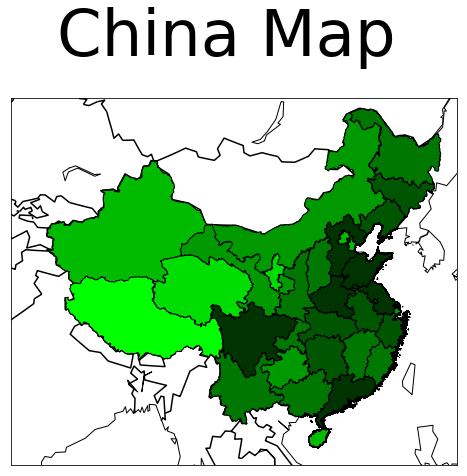

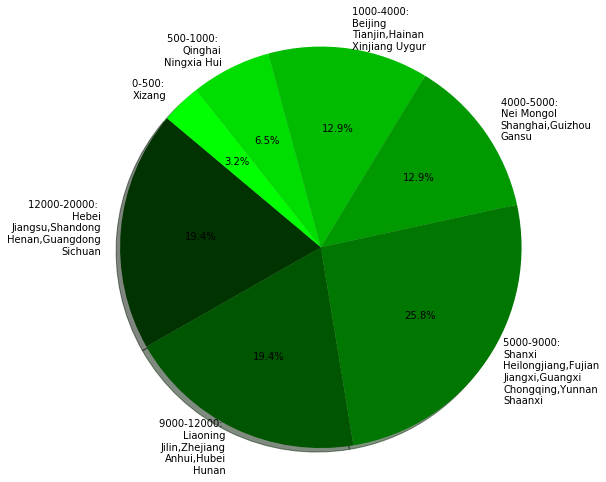

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np
import datetime


# init parameters
# Change figTitle to set different title on printed figure
figTitle = 'China Map'
# Change figHeight and figWidth to change figure size
figHeight = 8
figWidth = 8

data = [('Beijing',3652),
        ('Tianjin',2414),
        ('Hebei',13505),
        ('Shanxi',6289),
        ('Nei Mongol',4776),
        ('Liaoning',9724),
        ('Jilin',9026),
        ('Heilongjiang',7985),
        ('Shanghai',4390),
        ('Jiangsu',14981),
        ('Zhejiang',10193),
        ('Anhui',9449),
        ('Fujian',6221),
        ('Jiangxi',6620),
        ('Shandong',18710),
        ('Henan',15950),
        ('Hubei',11396),
        ('Hunan',11448),
        ('Guangdong',16335),
        ('Guangxi',6897),
        ('Hainan',1302),
        ('Chongqing',5915),
        ('Sichuan',14339),
        ('Guizhou',4862),
        ('Yunnan',6528),
        ('Xizang',367),
        ('Shaanxi',6494),
        ('Gansu',4341),
        ('Qinghai',738),
        ('Ningxia Hui',943),
        ('Xinjiang Uygur',3088)
        ]

colors = ['#00FF00','#00DD00','#00BB00','#009900',
          '#007700','#005500','#003300','#001100']

# data interval for above color
interval = [0,500,1000,4000,5000,9000,12000,20000]

repository = []

def find(_color) :
    for i in range(len(repository)):
        color, lable, count = repository[i]
        if color == _color:
            return i
    return None
            
def add(color, start, end, province):
    i = find(color)
    if i != None:
        color, lable, count = repository[i]
        count += 1
        if count%2 == 0:
            lable += "\n"+province            
        else:
            lable += ","+province
        repository[i] = (color, lable, count)
    else:    
        val = (color, str(start)+"-"+str(end)+": \n"+province,1)
        repository.append(val)
        
def get():
    sortedRepos = sorted(repository)
    colors = []
    labels = []
    counts = []
    for color, lable, count in sortedRepos:
        colors.append(color)
        labels.append(lable)
        counts.append(count)  
    return (colors, labels, counts)

def getColor(val):
    start = 0
    end = 0
    for i in range(len(interval)-1):
        start = interval[i]
        end = interval[i+1]
        if start <= val and val < end:
            return (colors[i],start,end)
    return (colors[len(interval)-1],start,end)
start = datetime.datetime.utcnow()

patchCollections = []

# function to patches array index for a given province
def getIndex(name):
    for i in range(len(data)):
        province, val = data[i]
        if(province == name):
            return i
    return -1

# patches is a 31*1 array to hold shape data for each province. 
patches = []
for i in range(len(data)):
    patches.append([])

fig     = plt.figure(figsize=(figHeight,figWidth))
ax      = fig.add_subplot(111)
fig.suptitle(figTitle, fontsize=64)

m = Basemap(llcrnrlon=77, llcrnrlat=14,
            urcrnrlon=140, urcrnrlat=51,
            projection='lcc', lat_1=33, lat_2=45, lon_0=100)
m.drawcoastlines(),[]
m.drawcountries(linewidth=1.5)

# all 6 of CHN_adm1 files must be in the same directory as this python file
m.readshapefile('./CHN_adm/CHN_adm1','states', drawbounds=True)

# create data for each province
for info, shape in zip(m.states_info, m.states):
    # NAME_1 is the property name of info that has 
    # province name defined in provinces array.
    index = getIndex(info['NAME_1'])
    assert (index >= 0),"index must be greater than or equal to 0!"
    patches[index].append( Polygon(np.array(shape), True) )

# plot each province map
for i in range(len(data)):
    # determine color index for each province
    province, val = data[i]
    color, rangeStart, rangeEnd = getColor(val)
    add(color, rangeStart, rangeEnd, province)
    p = PatchCollection(patches[i], 
                    facecolor= color, edgecolor='k', 
                    linewidths=1., zorder=2)
    patchCollections.append(p)
    ax.add_collection(p)


fig1     = plt.figure(figsize=(figHeight,figWidth))
ax      = fig1.add_subplot(111)
colors, labels, sizes = get()
ax.pie(sizes, labels=labels, colors=colors,
             autopct='%1.1f%%', shadow=True, startangle=140)
     
ax.axis('equal')

ax.plot()
end = datetime.datetime.utcnow()
print('{} seconds to complete.'.format((end-start).total_seconds()))
